In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm

In [2]:
feature_names = []
with open('../Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print 'Loaded feature names:', len(feature_names)

Loaded feature names: 126


In [3]:
X, Y = [], []

with open('../Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print train_data.shape, test_data.shape

(7000, 126) (1124, 126)


,n,Explained Variance,Cumulative Explained Variance
0,1,0.164043,0.164043
1,2,0.133235,0.297278
2,3,0.101735,0.399013
3,4,0.070634,0.469646
4,5,0.038666,0.508313
5,6,0.036808,0.545121
6,7,0.031282,0.576403
7,8,0.027337,0.603741
8,9,0.026165,0.629905
9,10,0.022309,0.652215


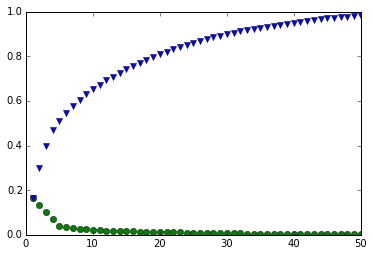

In [18]:
import pandas as pd
n = 50
pca = PCA(n_components = n)
pca.fit(train_data)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

N = range(1, n + 1)

plt.plot(N, explained_variance, 'go', N, cumulative_explained_variance, 'bv')

data_frame = pd.DataFrame({ 'n' : N } )
data_frame['Explained Variance'] = explained_variance
data_frame['Cumulative Explained Variance'] = cumulative_explained_variance

data_frame[ [ 'n', 'Explained Variance', 'Cumulative Explained Variance' ] ]

In [6]:
print(pca.explained_variance_ratio_)

[ 0.16404331  0.13323479]


In [9]:
range(1, 50)


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]